In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import tkinter as tk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR #Support Vector Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn .ensemble import GradientBoostingRegressor

In [ ]:
data = pd.read_csv('insurance.csv')
#top 5 rows
data.head()

In [ ]:
#last 5 rows
data.tail()

In [ ]:
data.shape #shape is an attribute of dataframe and not a method

In [ ]:
print("Number of rows: ", data.shape[0])
print("Number of columns: ", data.shape[1])

In [ ]:
data.info() #to get the information about the data inside the csv

In [ ]:
#to check the number of null values in a dataset
data.isnull().sum()

In [ ]:
#getting the statistics of the data
data.describe() 
#how to read for percentile: 25% of the people have age less than 27... 

In [ ]:
#to get statistical data also for categorical data
data.describe(include='all')

In [ ]:
#machine learning algortihms can only understand numbers and not strings
#so we need to convert the categorical data into numerical data
data['sex'].unique()

In [ ]:
#converting female to 0 and male to 1
data['sex'] = data['sex'].map({'female':0, 'male':1})

In [ ]:
#for smoker, yes to 1 and no to 0
data['smoker'] = data['smoker'].map({'yes':1, 'no':0})
data.head()

In [ ]:
#for region column
data['region'].unique()

In [ ]:
data['region'] = data['region'].map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})

In [ ]:
data.tail()

In [ ]:
#Starting with creation of X matrix for independent variables and y vector for dependent variable
X = data.drop(['charges'], axis=1)
y = data['charges']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
lr = LinearRegression()
lr.fit(X_train, y_train)
svm = SVR()
svm.fit(X_train, y_train)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [81]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gb.predict(X_test)

#comparing the results of models to see which one is the best
df = pd.DataFrame({'Actual':y_test, 'LR':y_pred1, 'SVM':y_pred2, 'RF':y_pred3, 'GB':y_pred4})
df

,Actual,LR,SVM,RF,GB
764,9095.06825,8924.407244,9548.261584,11481.133790,11001.128629
887,5272.17580,7116.295018,9492.515425,5193.174030,5840.174656
890,29330.98315,36909.013521,9648.758701,28130.445087,28001.980112
1293,9301.89355,9507.874691,9555.044136,10373.232291,9745.291602
259,33750.29180,27013.350008,9420.421978,34518.877305,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.902852,46898.395520,45431.423211
575,12222.89830,11814.555568,9625.431547,12462.803070,12465.025294
535,6067.12675,7638.107736,9504.168517,6387.477234,6974.336525
543,63770.42801,40959.081722,9605.004594,46746.535966,47862.047791


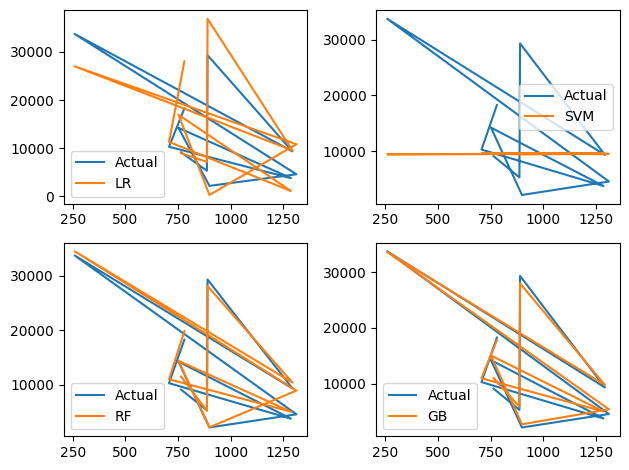

In [86]:
#visually comparing the results to see which one is the best
plt.subplot(221)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['LR'].iloc[0:11],label='LR')
plt.legend()

plt.subplot(222)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['SVM'].iloc[0:11],label='SVM')
plt.legend()

plt.subplot(223)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['RF'].iloc[0:11],label='RF')
plt.legend()

plt.subplot(224)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['GB'].iloc[0:11],label='GB')

plt.tight_layout()
plt.legend()

In [88]:
#evaluating the algorithm using r square. r square value is used to measure the goodness of fit. Greater the value of r square, #better is the model
from sklearn import metrics

In [89]:
score1 = metrics.r2_score(y_test, y_pred1)
score2 = metrics.r2_score(y_test, y_pred2)
score3 = metrics.r2_score(y_test, y_pred3)
score4 = metrics.r2_score(y_test, y_pred4)

In [90]:
print(score1, score2, score3, score4)

0.7833463107364539 -0.07229762787861826 0.8657003137806157 0.8779726251291786
